In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('diamonds.csv', index_col=0)

__У функции read_csv, есть ряд важных параметров:__
- sep — разделитель данных, по умолчанию ','
- decimal — разделитель числа на целую и дробную часть, по умолчанию '.'
- names — список с названиями колонок
- skiprows — если файл содержит системную информацию, можно просто её пропустить
- index_col - номер колонки с индексом


In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.shape

(53940, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


__У метода info() можно передать дополнительные параметры, среди которых:__

- verbose: печатать ли информацию о DataFrame полностью (если таблица очень большая, то некоторая информация может потеряться)
- memory_usage: печатать ли потребление памяти (по умолчанию используется True, но можно поставить либо False, что уберёт потребление памяти, либо 'deep' , что подсчитает потребление памяти более точно)
- null_counts: подсчитывать ли количество пустых элементов (по умолчанию True)

In [9]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Чтобы посмотреть статистику по нечисловым признакам (например, по строчным (object) или булевым (bool) данным), нужно явно указать интересующие типы в параметре include метода describe, тогда:
- unique – число уникальных категорий в колонке
- top – самая часто встречаемая категория
- freq – количество вхождений самой часто встречаемой категории в датасете

In [11]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [14]:
# применяем метод groupby
# df.groupby(by='color')

# выбираем интересующий параметр
# df.groupby(by='color')['price']

# выбираем, что считать (мин, мах, среднее)
# df.groupby(by='color')['price'].mean()

df.groupby(by='color')['price'].mean() # На выходе получился pd.Series

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [15]:
df.groupby(by='color')[['price']].mean() # На выходе pd.DataFrame

,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


In [64]:
df.groupby(by='color')[['price', 'carat']].mean() # Из нескольких колонок

,price,carat
color,,
D,3169.954096,0.657795
E,3076.752475,0.657867
F,3724.886397,0.736538
G,3999.135671,0.771190
H,4486.669196,0.911799
I,5091.874954,1.026927
J,5323.818020,1.162137


<AxesSubplot:xlabel='color'>

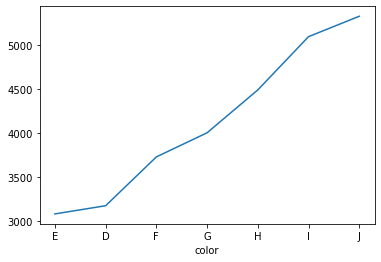

In [26]:
# sort_values() - сортировка
# plot() - построение простой прямой
df.groupby(by='color')['price'].mean().sort_values().plot()

<AxesSubplot:xlabel='color'>

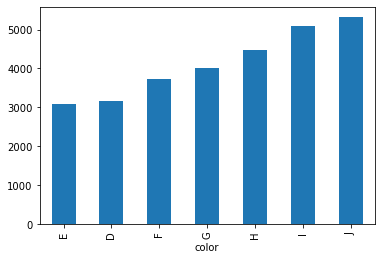

In [33]:
# Столбчатый график
df.groupby('color')['price'].mean().sort_values().plot(kind='bar')

In [34]:
# С помощью метода agg можно добавлять несколько вычисляемых характеристик
df.groupby('color')[['price', 'carat']].agg(['mean', 'median', 'max', 'min'])

price                         carat                   
              mean  median    max  min      mean median   max   min
color                                                              
D      3169.954096  1838.0  18693  357  0.657795   0.53  3.40  0.20
E      3076.752475  1739.0  18731  326  0.657867   0.53  3.05  0.20
F      3724.886397  2343.5  18791  342  0.736538   0.70  3.01  0.20
G      3999.135671  2242.0  18818  354  0.771190   0.70  3.01  0.23
H      4486.669196  3460.0  18803  337  0.911799   0.90  4.13  0.23
I      5091.874954  3730.0  18823  334  1.026927   1.00  4.01  0.23
J      5323.818020  4234.0  18710  335  1.162137   1.11  5.01  0.23

<AxesSubplot:xlabel='color'>

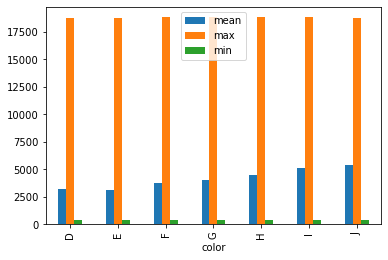

In [39]:
df.groupby('color')['price'].agg(['mean', 'max', 'min']).plot(kind='bar')

__Сводные таблицы pivot_table__

In [49]:
# columns='color' - что будет колонками в сводной таблице
# index='cut' - что будет строками в сводной таблице
# values='price' - что используем для подсчета
# aggfunc='mean' - что считаем среднее, мин, макс и т.д.

df.pivot_table(columns='color', index='cut', values='price', aggfunc='mean')

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274


<AxesSubplot:xlabel='cut'>

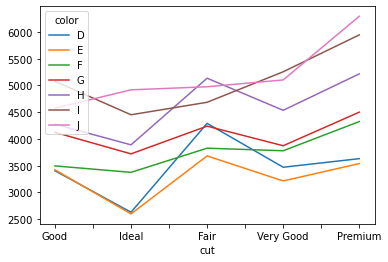

In [59]:
df.pivot_table(columns='color', index='cut', values='price', aggfunc='mean').sort_values(by='J').plot()

In [68]:
# Подсчет различных значений
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [69]:
# Вывод уникальных значений типо Set
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [70]:
# Количество уникальных значений
df['cut'].nunique()

5

<AxesSubplot:ylabel='cut'>

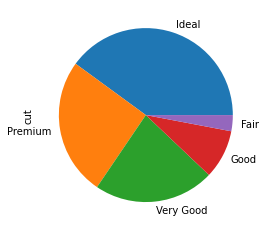

In [71]:
df['cut'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Frequency'>

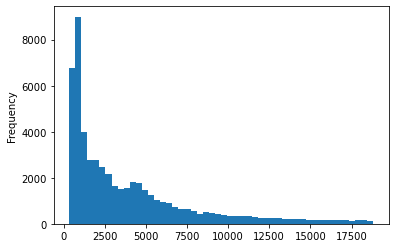

In [73]:
# Параметр bins - количество столбцов
f['price'].plot(kind='hist', bins=50)

In [77]:
# Додавбление новой колонки
df['volume'] = df['x'] * df['y'] * df['z']

In [78]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [83]:
# Удаление колонки
df.drop('carat', axis=1)

,cut,color,clarity,depth,table,price,x,y,z,volume
1,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...
53936,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53937,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53938,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53939,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [82]:
# Carat остались нужно добавить inplace=True
# df.drop('carat', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [84]:
# Изменение колонки
df['carat'] = df['carat'] * 200

In [87]:
# Переименование колонки
df.rename(columns={'carat': 'weight'}, inplace=True)

In [89]:
df.head()

,weight,cut,color,clarity,depth,table,price,x,y,z,volume
1,46.0,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,42.0,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,46.0,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,58.0,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,62.0,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


<AxesSubplot:xlabel='weight', ylabel='price'>

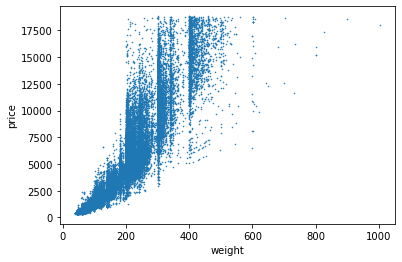

In [96]:
# Построение точечного графика(scatter)
# Параметр s - размер точек
df.plot(kind='scatter', x='weight', y='price', s=0.3)

<AxesSubplot:xlabel='weight', ylabel='price'>

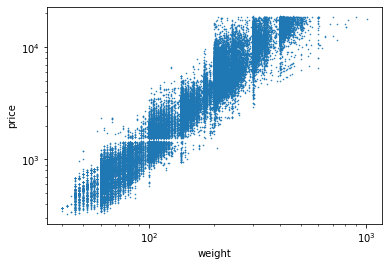

In [97]:
# Параметр loglog - логорифмирует х и у
df.plot(kind='scatter', x='weight', y='price', s=0.3, loglog=True)

__Индексация__

- для индексации по номеру строки и столбца используется атрибут __iloc[:, :]__
сначала указываются индексы строк, затем – столбцов
- для индексации по имени строки и столбца используется атрибут __loc[:, :]__
сначала указываются имена строк, затем – столбцов

In [101]:
df.loc[[45,50]]

,weight,cut,color,clarity,depth,table,price,x,y,z,volume
45,64.0,Good,H,SI2,63.1,56.0,403,4.34,4.37,2.75,52.155950
50,58.0,Very Good,H,SI2,60.7,60.0,404,4.33,4.37,2.64,49.954344


In [102]:
df.loc[[45, 50], ['weight', 'price']]

,weight,price
45,64.0,403
50,58.0,404


In [104]:
df.iloc[45:50, 0:3]

,weight,cut,color
46,58.0,Premium,F
47,64.0,Very Good,H
48,64.0,Good,H
49,50.0,Very Good,E
50,58.0,Very Good,H


In [105]:
df.iloc[[45,50], [0,3]]

,weight,clarity
46,58.0,SI1
51,48.0,SI1


In [127]:
df[df['volume'] == 0][['weight', 'cut']]

,weight,cut
2208,200.0,Premium
2315,202.0,Premium
4792,220.0,Premium
5472,202.0,Premium
10168,300.0,Good
11183,214.0,Ideal
11964,200.0,Very Good
13602,230.0,Ideal
15952,228.0,Fair
24395,436.0,Premium


In [128]:
df[(df['volume'] >= 100) & (df['volume'] <= 200)]

,weight,cut,color,clarity,depth,table,price,x,y,z,volume
91,140.0,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57,116.396280
92,172.0,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52,143.716320
93,140.0,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50,113.116500
94,142.0,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56,115.865184
95,156.0,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72,126.437220
...,...,...,...,...,...,...,...,...,...,...,...
53936,144.0,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53937,144.0,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53938,140.0,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53939,172.0,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [129]:
# Тоже самое, но по шагам
over100 = df['volume'] >= 100
under200 = df['volume'] <= 200
df[over100 & under200]

,weight,cut,color,clarity,depth,table,price,x,y,z,volume
91,140.0,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57,116.396280
92,172.0,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52,143.716320
93,140.0,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50,113.116500
94,142.0,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56,115.865184
95,156.0,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72,126.437220
...,...,...,...,...,...,...,...,...,...,...,...
53936,144.0,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53937,144.0,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53938,140.0,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53939,172.0,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


__Работа со строками__

Для работы со строкововыми колонками воспользоваться методами

- isin() – для того, чтобы оставить лишь те строки, категории которой лежат в некотором списке
df['col'].isin(['category1', 'category2'])
- str – для того, чтобы использовать методы, которые есть у строк
- str.contains() – для того, чтобы оставить строки, содержание которых имеет определенный текст
df['col'].str.contains(['some_text'])

In [130]:
df['cut'].isin(['Ideal, Premium'])

1        False
2        False
3        False
4        False
5        False
         ...  
53936    False
53937    False
53938    False
53939    False
53940    False
Name: cut, Length: 53940, dtype: bool

In [131]:
# Вывод где присутствует Ideal and Premium
df[df['cut'].isin(['Idela', 'Premium'])]

,weight,cut,color,clarity,depth,table,price,x,y,z,volume
2,42.0,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
4,58.0,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
13,44.0,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,34.715136
15,40.0,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,32.262375
16,64.0,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,51.883728
...,...,...,...,...,...,...,...,...,...,...,...
53929,158.0,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68,132.254784
53931,142.0,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,115.988754
53932,142.0,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,112.813386
53935,144.0,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,116.721246


In [132]:
# Вывод где присутсвует Good (Good, Very Good)
df[df['cut'].str.contains('Good')]

,weight,cut,color,clarity,depth,table,price,x,y,z,volume
3,46.0,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
5,62.0,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
6,48.0,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
7,48.0,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
8,52.0,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081
...,...,...,...,...,...,...,...,...,...,...,...
53928,158.0,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54,131.503212
53933,140.0,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47,114.126912
53934,140.0,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49,113.588332
53937,144.0,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
